#ASSIGNMENT-5


In [ ]:
from tensorflow.keras.models import Sequential #Here, the required modules from TensorFlow Keras are imported. These modules will be used to build the CNN model.
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
#A Sequential model is initialized and named "Sequential_CNN". The Sequential model is a linear stack of layers, where you add one layer at a time.
CNN = Sequential(name="Sequential_CNN")
#First layer
CNN.add(Conv2D(16, kernel_size=(3, 3),
               strides=(2, 2), padding="same", #The strides=(2, 2) indicates that the filter will move 2 pixels at a time in both the horizontal and vertical directions
               activation="relu", input_shape=(32, 32, 3)))  # Update input_shape here
# MaxPooling layer
CNN.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2),
                     padding="valid"))
#The pool_size=(2, 2) specifies a 2x2 window for pooling,
#and the strides=(2, 2) indicates that the window will move 2 pixels at a time in both the horizontal and vertical directions.
#The padding="valid" means no padding will be applied, and only valid positions will be considered for pooling.

#Adding the second Convolutional layer:
CNN.add(Conv2D(32, kernel_size=(3, 3),
               strides=(2, 2), padding="same",
               activation="relu"))
#Adding the second MaxPooling layer:
CNN.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2),
                     padding="valid"))
#Flatting layer or last layer the output
CNN.add(Flatten())
#Adding Dense layers:
CNN.add(Dense(64, activation='relu'))#The first Dense layer has 64 neurons with the ReLU activation function
CNN.add(Dense(32, activation='relu'))
#Adding the final Dense layer:
CNN.add(Dense(10, activation='softmax'))
#Summarizing the model
CNN.summary()


Model: "Sequential_CNN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 16, 16, 16)        448       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 8, 8, 16)         0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 4, 4, 32)          4640      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 2, 2, 32)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 64)             

In [ ]:
from matplotlib import pyplot
from keras.datasets import cifar10
# load dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 3s 0us/step


In [ ]:
# Checking loaded data
print('Total number of Images in the Dataset:', len(x_train) + len(x_test))
print('Number of train images:', len(x_train))
print('Number of test images:', len(x_test))
print('Shape of training dataset:',x_train.shape)
print('Shape of testing dataset:',x_test.shape)

Total number of Images in the Dataset: 60000
Number of train images: 50000
Number of test images: 10000
Shape of training dataset: (50000, 32, 32, 3)
Shape of testing dataset: (10000, 32, 32, 3)


In [ ]:
#Normalize the pixel values:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0


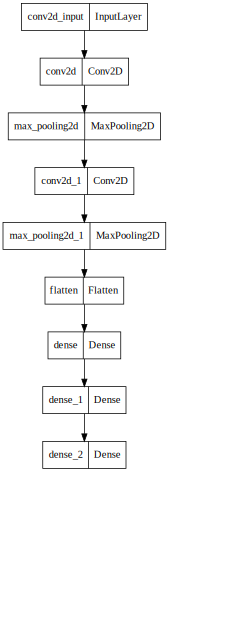

In [ ]:
# Flow chart of the model
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model

plot_model(CNN, to_file='model.png')
SVG(model_to_dot(CNN).create(prog='dot', format='svg'))

In [ ]:
#Compile the model #The loss function 'sparse_categorical_crossentropy' is appropriate for multi-class classification tasks with integer labels (like CIFAR-10). The metric 'accuracy' will be used to monitor the model's performance during training.
CNN.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])


In [ ]:
#Train the model
hist = CNN.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.1)


Epoch 1/10
1407/1407 [==============================] - 15s 10ms/step - loss: 2.3483 - accuracy: 0.1713 - val_loss: 1.8374 - val_accuracy: 0.2860
Epoch 2/10
1407/1407 [==============================] - 14s 10ms/step - loss: 1.7217 - accuracy: 0.3401 - val_loss: 1.6065 - val_accuracy: 0.4094
Epoch 3/10
1407/1407 [==============================] - 13s 9ms/step - loss: 1.5180 - accuracy: 0.4327 - val_loss: 1.4357 - val_accuracy: 0.4678
Epoch 4/10
1407/1407 [==============================] - 15s 11ms/step - loss: 1.4203 - accuracy: 0.4766 - val_loss: 1.4302 - val_accuracy: 0.4832
Epoch 5/10
1407/1407 [==============================] - 13s 10ms/step - loss: 1.3585 - accuracy: 0.5053 - val_loss: 1.3925 - val_accuracy: 0.4970
Epoch 6/10
1407/1407 [==============================] - 13s 9ms/step - loss: 1.3028 - accuracy: 0.5264 - val_loss: 1.2889 - val_accuracy: 0.5346
Epoch 7/10
1407/1407 [==============================] - 13s 9ms/step - loss: 1.2651 - accuracy: 0.5432 - val_loss: 1.3181 - va

In [ ]:
#Evaluate the model
test_loss, test_accuracy = CNN.evaluate(x_test, y_test)
print(f'Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}')


313/313 [==============================] - 1s 4ms/step - loss: 1.2510 - accuracy: 0.5585
Test Loss: 1.2510, Test Accuracy: 0.5585


#ASSIGNMENT-6

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.utils import to_categorical

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [14]:
cdf = pd.read_csv("/content/drive/MyDrive/connsumerComplaintsSmall.csv")

In [15]:
cdf = cdf.dropna(subset=['Consumer complaint narrative'])


X = cdf.drop(['Product'], axis=1)
y = cdf['Product']


label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
max_seq_length = 200
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train['Consumer complaint narrative'])
vocab_size = len(tokenizer.word_index) + 1
X_train_text = tokenizer.texts_to_sequences(X_train['Consumer complaint narrative'])
X_test_text = tokenizer.texts_to_sequences(X_test['Consumer complaint narrative'])
X_train_text = pad_sequences(X_train_text, maxlen=max_seq_length, padding='post')
X_test_text = pad_sequences(X_test_text, maxlen=max_seq_length, padding='post')

In [17]:
num_classes = len(np.unique(y))
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

In [18]:
embedding_dim = 100
model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_seq_length))
model.add(LSTM(100))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [19]:
batch_size = 32
num_epochs = 10
model.fit(X_train_text, y_train, validation_data=(X_test_text, y_test), epochs=num_epochs, batch_size=batch_size)


Epoch 1/10
1/1 [==============================] - 3s 3s/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.7275 - val_accuracy: 0.0000e+00
Epoch 2/10
1/1 [==============================] - 0s 170ms/step - loss: 0.6937 - accuracy: 0.5000 - val_loss: 0.7041 - val_accuracy: 0.0000e+00
Epoch 3/10
1/1 [==============================] - 0s 176ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6803 - val_accuracy: 1.0000
Epoch 4/10
1/1 [==============================] - 0s 180ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6711 - val_accuracy: 1.0000
Epoch 5/10
1/1 [==============================] - 0s 172ms/step - loss: 0.6934 - accuracy: 0.5000 - val_loss: 0.6752 - val_accuracy: 1.0000
Epoch 6/10
1/1 [==============================] - 0s 190ms/step - loss: 0.6933 - accuracy: 0.5000 - val_loss: 0.6855 - val_accuracy: 1.0000
Epoch 7/10
1/1 [==============================] - 0s 174ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6966 - val_accuracy: 0.0000e+00
Epoch 8/10


In [20]:
loss, accuracy = model.evaluate(X_test_text, y_test)
print(f"Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}")

1/1 [==============================] - 0s 64ms/step - loss: 0.7063 - accuracy: 0.0000e+00
Test Loss: 0.7063, Test Accuracy: 0.0000


#ASSIGNMENT-7

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense, Dropout, SpatialDropout1D
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report

In [3]:
# Load the datasets
train_df = pd.read_csv('/content/drive/MyDrive/emotion-labels-train.csv')
test_df = pd.read_csv('/content/drive/MyDrive/emotion-labels-test.csv')

In [4]:
train_df.head()

text label
0  Just got back from seeing @GaryDelaney in Burs...   joy
1  Oh dear an evening of absolute hilarity I don'...   joy
2  Been waiting all week for this game ❤️❤️❤️ #ch...   joy
3  @gardiner_love : Thank you so much, Gloria! Yo...   joy
4  I feel so blessed to work with the family that...   joy

In [5]:
X_train = train_df['text']
y_train = train_df['label']
X_test = test_df['text']
y_test = test_df['label']

In [6]:
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)


In [7]:
max_seq_length = 100
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
vocab_size = len(tokenizer.word_index) + 1
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)
X_train = pad_sequences(X_train, maxlen=max_seq_length, padding='post')
X_test = pad_sequences(X_test, maxlen=max_seq_length, padding='post')

In [8]:
embedding_dim = 100
model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_seq_length))
model.add(SpatialDropout1D(0.2))
model.add(Bidirectional(LSTM(128, return_sequences=True)))
model.add(Bidirectional(LSTM(64)))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dense(len(label_encoder.classes_), activation='softmax'))

In [9]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


batch_size = 32
num_epochs = 10
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=num_epochs, batch_size=batch_size)

Epoch 1/10
113/113 [==============================] - 104s 836ms/step - loss: 1.3482 - accuracy: 0.3424 - val_loss: 1.2443 - val_accuracy: 0.4357
Epoch 2/10
113/113 [==============================] - 92s 816ms/step - loss: 0.6047 - accuracy: 0.7753 - val_loss: 0.8566 - val_accuracy: 0.6957
Epoch 3/10
113/113 [==============================] - 95s 839ms/step - loss: 0.1808 - accuracy: 0.9469 - val_loss: 0.8770 - val_accuracy: 0.7362
Epoch 4/10
113/113 [==============================] - 112s 997ms/step - loss: 0.0967 - accuracy: 0.9748 - val_loss: 1.0066 - val_accuracy: 0.7231
Epoch 5/10
113/113 [==============================] - 88s 784ms/step - loss: 0.0732 - accuracy: 0.9801 - val_loss: 1.1695 - val_accuracy: 0.6976
Epoch 6/10
113/113 [==============================] - 97s 862ms/step - loss: 0.0718 - accuracy: 0.9754 - val_loss: 1.1100 - val_accuracy: 0.7104
Epoch 7/10
113/113 [==============================] - 91s 802ms/step - loss: 0.0648 - accuracy: 0.9784 - val_loss: 1.0860 - val_

In [11]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}")

y_pred = model.predict(X_test)
y_pred_labels = np.argmax(y_pred, axis=1)


y_test_emotions = label_encoder.inverse_transform(y_test)
y_pred_emotions = label_encoder.inverse_transform(y_pred_labels)

print(classification_report(y_test_emotions, y_pred_emotions))


99/99 [==============================] - 17s 173ms/step - loss: 1.2369 - accuracy: 0.7269
Test Loss: 1.2369, Test Accuracy: 0.7269
99/99 [==============================] - 21s 185ms/step
              precision    recall  f1-score   support

       anger       0.74      0.74      0.74       760
        fear       0.71      0.75      0.73       995
         joy       0.72      0.83      0.77       714
     sadness       0.75      0.57      0.65       673

    accuracy                           0.73      3142
   macro avg       0.73      0.72      0.72      3142
weighted avg       0.73      0.73      0.72      3142

